<a href="https://colab.research.google.com/github/ashutosh00009/MACHINE-LEARNING-SUMMER-TRAINING/blob/main/Day_8/Transfer_Learning_Using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/dataset/train'
valid_path = '/content/gdrive/MyDrive/dataset/val'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  


58900480/58889256 [==============================] - 0s 0us/step


In [33]:
 # useful for getting number of classes
folders = glob('/content/gdrive/MyDrive/dataset/train/*')
print(len(folders))

5


In [34]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [35]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [36]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [37]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

''' r=model.fit_generator(training_set,
                         epochs = 5,
                      steps_per_epoch=len(training_set),
                         nb_val_samples = 2000)'''

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


' r=model.fit_generator(training_set,\n                         epochs = 5,\n                      steps_per_epoch=len(training_set),\n                         nb_val_samples = 2000)'

In [38]:
# fit the model
'''r = Model.fit_generator( training_set, validation_data=test_set, epochs=5, steps_per_epoch=len(training_set),validation_steps=len(test_set))'''
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/5
3/3 [==============================] - 71s 28s/step - loss: 3.0946 - accuracy: 0.1505 - val_loss: 2.0019 - val_accuracy: 0.2000
Epoch 2/5
3/3 [==============================] - 63s 25s/step - loss: 1.3506 - accuracy: 0.4516 - val_loss: 2.1333 - val_accuracy: 0.2800
Epoch 3/5
3/3 [==============================] - 56s 21s/step - loss: 1.6924 - accuracy: 0.4946 - val_loss: 1.4716 - val_accuracy: 0.4800
Epoch 4/5
3/3 [==============================] - 53s 19s/step - loss: 0.8278 - accuracy: 0.6989 - val_loss: 1.3486 - val_accuracy: 0.4800
Epoch 5/5
3/3 [==============================] - 63s 25s/step - loss: 0.6974 - accuracy: 0.7419 - val_loss: 1.2353 - val_accuracy: 0.5200


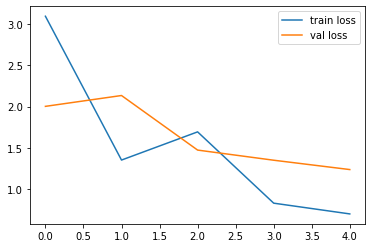

<Figure size 432x288 with 0 Axes>

In [39]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



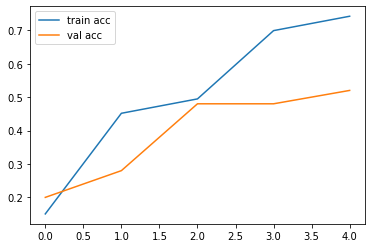

<Figure size 432x288 with 0 Axes>

In [40]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



In [41]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')